# Iowa House Market

The dataset contains 79 explanatory variables that describe nearly every aspect of residential homes in Ames, Iowa. Through feature analysis, we were able to generate ideas for new features that could enhance model performance. In this notebook, I will walk through the processes of data wrangling using this dataset.

### 1. Data Exploration

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew

Sourcing and Loading of Data

In [4]:
# Path of the file to read. We changed the directory structure to simplify submitting to a competition
iowa_file_path = "C:\\Users\\eboat\\OneDrive\\Documents\\DATA SCIENCE ASSIGNMENT\\Iowa House Market\\train.csv"

home_data = pd.read_csv(iowa_file_path)

#home_data.head()
home_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Preliminary information and description of the data

In [5]:
# Display information about the dataset
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Display summary statistics of the dataset
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 2. Data Cleaning

I want to identify which columns have messy data, sort the results, and calculate the percentage of missing data. It's standard practice to drop columns that are missing more than 80% of their data, as they do not provide enough information for a model.

In [7]:
# Checking the sum of any missing values
home_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

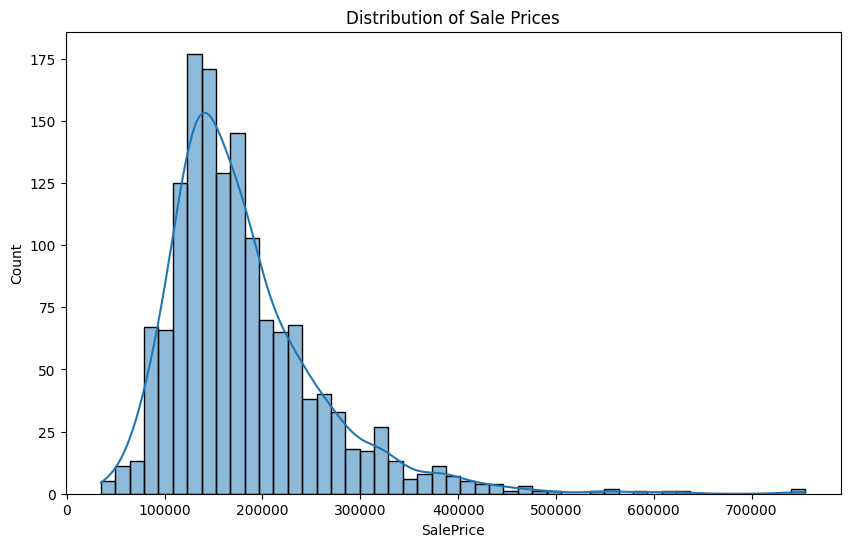

In [8]:
# Visualizing the data
plt.figure(figsize=(10, 6))
sns.histplot(home_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

I observed that columns such as PoolQC, MiscFeature, and Alley have over 90% missing data. Should we drop these columns, or should we fill them with the string "None"? On the other hand, columns like Electrical and MasVnrType might only have one or two missing values, which can be easily fixed.

In [9]:
# Calculate absolute count and percentage of missing values
missing_data = home_data.isnull().sum().sort_values(ascending=False)
percent_missing = (home_data.isnull().sum() / len(home_data) * 100).sort_values(ascending=False)

# Combining the results into a single DataFrame for better visualization
missing_report = pd.concat([missing_data, percent_missing], axis=1, keys=['Total', 'Percent'])

# Calling only the columns that actually have missing values
print(missing_report[missing_report['Total'] > 0])


              Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
MasVnrType      872  59.726027
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageQual       81   5.547945
GarageFinish     81   5.547945
GarageType       81   5.547945
GarageYrBlt      81   5.547945
GarageCond       81   5.547945
BsmtFinType2     38   2.602740
BsmtExposure     38   2.602740
BsmtCond         37   2.534247
BsmtQual         37   2.534247
BsmtFinType1     37   2.534247
MasVnrArea        8   0.547945
Electrical        1   0.068493


The NaN values for PoolQC or Alley don't indicate lost data; they signify that the house does not have a pool or an alley. If we leave these as NaN, the model may ignore these rows or even crash. Therefore, it's necessary to convert them to the string "None," allowing the model to treat "No Pool" as a specific feature. Even though these columns may be 99% empty, having a pool is a valuable feature signal. By changing NaN to "None," we preserve this distinction.

In [10]:
# Categorical columns where NA means "None" or "No facility"
cols_to_fix = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
    'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
    'BsmtFinType1', 'BsmtFinType2'
]

for col in cols_to_fix:
    home_data[col] = home_data[col].fillna("None")

# Numerical columns where NA should be 0 (e.g., no garage = 0 sq ft)
home_data['MasVnrArea'] = home_data['MasVnrArea'].fillna(0)
home_data['GarageYrBlt'] = home_data['GarageYrBlt'].fillna(0)

# Rare cases (Electrical only has 1 missing) - fill with most frequent (mode)
home_data['Electrical'] = home_data['Electrical'].fillna(home_data['Electrical'].mode()[0])

# Verify the results
print(home_data[cols_to_fix].isnull().sum())


PoolQC          0
MiscFeature     0
Alley           0
Fence           0
MasVnrType      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64


### 3. Data Type Correction

Some data types (dtypes) do not accurately reflect the physical reality of the house features. For example, GarageYrBlt may still be a "float" (like 2005.0) because of how Pandas handles NaN values, or some categories might be stored as "object" when they should be "categorical."

In [11]:
# Check current data types
print(home_data[['GarageYrBlt', 'MSSubClass', 'OverallQual']].dtypes)

# Fix Year columns: Since you can't have a half-year (e.g., 2005.5), 
# convert them to integers (int64) after filling NaNs with 0
home_data['GarageYrBlt'] = home_data['GarageYrBlt'].astype(int)

# Handle Numerical-Categorical Trap: 
# 'MSSubClass' uses numbers (20, 30, 60) to represent house types. 
# A model will think 60 is "3 times more" than 20, which is wrong. 
# Convert it to a string/object so the model treats it as a label.
home_data['MSSubClass'] = home_data['MSSubClass'].apply(str)

# Final Verification
print("\n--- After Correction ---")
print(home_data[['GarageYrBlt', 'MSSubClass']].dtypes)


GarageYrBlt    float64
MSSubClass       int64
OverallQual      int64
dtype: object

--- After Correction ---
GarageYrBlt     int64
MSSubClass     object
dtype: object


### 4. Feature Engineering

While individual floor metrics are acceptable, the total living area (including the basement) is typically the strongest predictor of SalePrice. For this reason, I created a Total Square Footage feature.

In [12]:
# Create TotalSF by summing first floor, second floor, and total basement area
home_data['TotalSF'] = (
    home_data['1stFlrSF'] + 
    home_data['2ndFlrSF'] + 
    home_data['TotalBsmtSF']
)

# Optional: Create a 'TotalBath' feature (Full baths + 0.5 * Half baths)
home_data['TotalBath'] = (
    home_data['FullBath'] + 
    (0.5 * home_data['HalfBath']) + 
    home_data['BsmtFullBath'] + 
    (0.5 * home_data['BsmtHalfBath'])
)

# Check the first few rows to verify
print(home_data[['TotalSF', 'TotalBath', 'SalePrice']].head())


   TotalSF  TotalBath  SalePrice
0     2566        3.5     208500
1     2524        2.5     181500
2     2706        3.5     223500
3     2473        2.0     140000
4     3343        3.5     250000


### 5. Outlier Detection and Removal

Identifying outliers is essential, as extreme data points—such as large homes sold at unusually low prices—can significantly skew linear regression models. Visualizing these outliers will help determine if we need to remove them.

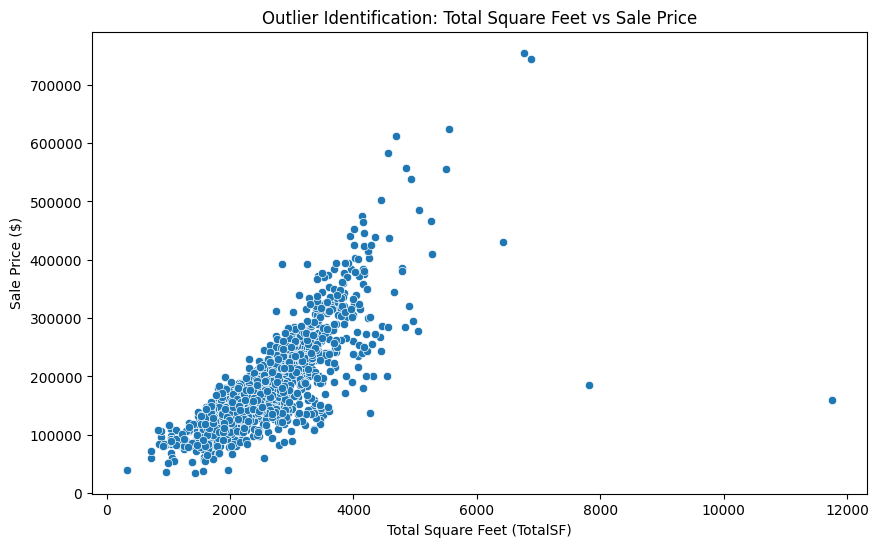

In [13]:
# Plotting TotalSF vs SalePrice to identify outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=home_data['TotalSF'], y=home_data['SalePrice'])

# Adding labels 
plt.title('Outlier Identification: Total Square Feet vs Sale Price')
plt.xlabel('Total Square Feet (TotalSF)')
plt.ylabel('Sale Price ($)')
plt.show()

Houses with over 4,000 square feet of living area are unusual for agricultural or commercial properties, so it is recommended to remove them. Eliminating even two or three extreme points can substantially improve the R-squared score, as linear models are highly sensitive to outliers. We subsequently removed these houses because they are "Influential Points" that do not represent the typical residential market in Iowa.

In [14]:
# Identify the outliers (Houses with TotalSF > 4000 and SalePrice < 300,000)
outliers = home_data[(home_data['TotalSF'] > 4000) & (home_data['SalePrice'] < 300000)].index

# Dropping the outliers   
home_data = home_data.drop(outliers, axis=0)

print(f"Removed {len(outliers)} outliers.")


Removed 24 outliers.


Now that the data is clean, I will apply log transformation to SalePrice to address skewness. In statistical modeling, particularly for housing prices, we often encounter right skewness. This means that most houses are moderately priced, while a few very expensive mansions inflate the average. Linear models perform best when the target variable (SalePrice) follows a normal distribution (the "bell curve").

### 6. Addressing Skewness and visualizing

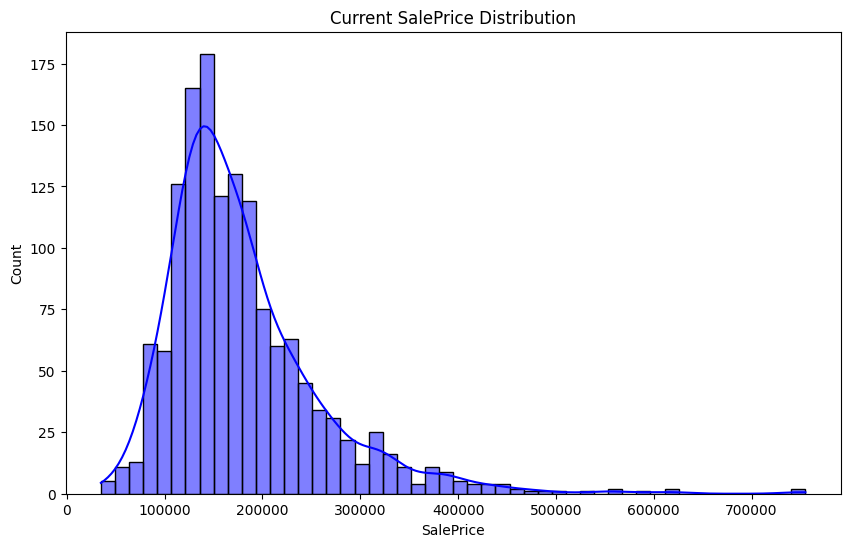

Skewness score: 1.93


In [15]:
# Visualize the distribution of SalePrice after outlier removal
plt.figure(figsize=(10, 6))
sns.histplot(home_data['SalePrice'], kde=True, color='blue')
plt.title('Current SalePrice Distribution')
plt.show()

# 2. Calculate Skewness score (0 is perfectly symmetrical)
print(f"Skewness score: {home_data['SalePrice'].skew():.2f}")


If the skewness score is greater than 1, the data is highly skewed. For the Iowa House Market dataset, this value is usually around 1.88, which poses a challenge for regression analysis. To remedy this issue, we apply a mathematical logarithm, which "shrinks" the gap between expensive and average houses, making the distribution more symmetrical.

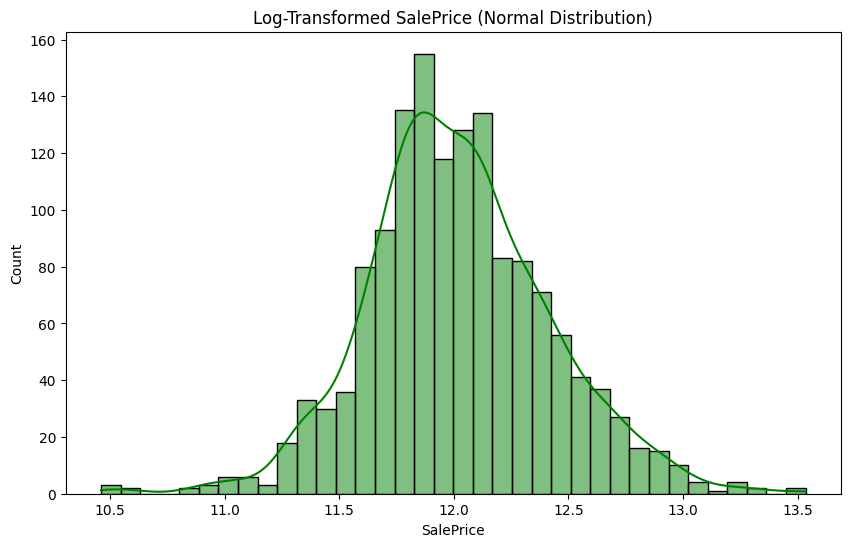

New Skewness score: 0.15


In [16]:
# Applying Log Transformation  
home_data['SalePrice'] = np.log1p(home_data['SalePrice'])

# Visualize the fix
plt.figure(figsize=(10, 6))
sns.histplot(home_data['SalePrice'], kde=True, color='green')
plt.title('Log-Transformed SalePrice (Normal Distribution)')
plt.show()

print(f"New Skewness score: {home_data['SalePrice'].skew():.2f}")


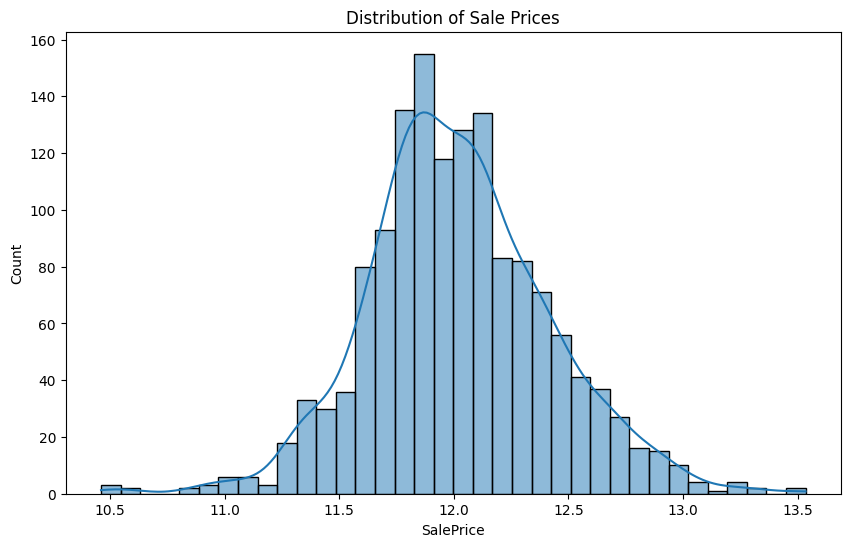

In [17]:
# EDA (Exploratory Data Analysis) - Visualizing the Target
plt.figure(figsize=(10, 6))
sns.histplot(home_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

In [18]:
# Final safety check
final_missing = home_data.isnull().sum()
print(final_missing[final_missing > 0])

LotFrontage    254
dtype: int64


This should return an empty list if everything is clean

In [19]:
# Save the wrangled data to a new CSV file
# index=False prevents Pandas from adding an extra 'Unnamed: 0' column
home_data.to_csv('Ames_Housing_Cleaned.csv', index=False)

print("Success! Your wrangled dataset is saved as 'Ames_Housing_Cleaned.csv'")


Success! Your wrangled dataset is saved as 'Ames_Housing_Cleaned.csv'
